# Introduction
The motivation behind this notebook is to determine how strong a password is. And not just by looking at entropy analysis or how complex a password is, but by looking at the correlation of password strength and how it varies when compared against a number of different categories which we can categorize the password string by.

# Background Research
It is so often said to us that we should use passwords that are not common words. But let's say my password is 'klo$0', instead of what I would usually use (not) 'y@tin'.

Both these passwords are 5 characters each. The idea that a computer program can probably guess these passwords in an insignificant amount of time can be worrying. Let's just try it ourselves and see how long it would take for a computer to find these two passwords:

In [1]:
import time
import string
import random

# all the characters that can be used in a password
all_chars = string.ascii_uppercase + string.ascii_lowercase + string.punctuation + string.digits
slen = len(all_chars)
# calculating time for random 5 character string:
start_rand = time.time()
check = ''.join(random.choice(all_chars) for _ in range(5))
end_rand = time.time()
elapsed = end_rand - start_rand
print("It took {0:.10f} seconds to guess a random 5 character string from a range of characters {1} characters long".format(elapsed, slen))

It took 0.0001230240 seconds to guess a random 5 character string from a range of characters 94 characters long


We know that there are 5 possibilities, and we also know that there are 94 characters to chose from. So we can have 94^5 possible combinations of possible 5 character strings. As such, we can multiply the number of combinations with the amount of time it takes to compute one combination, and find out how much time (years) it would have at most taken to guess a random password of 5 characters. 

In [2]:
pos = 94 ** 5
total = pos * elapsed # total time taken
days = total / 86400 # seconds to days conversion
years = days / 365 # days to years conversion
print("It will take at most {0:.5} years to guess your 5 character password!".format(years))

It will take at most 0.02863 years to guess your 5 character password!


So if I don't change my password every few weeks, it could potentially be hacked. Now obviously my password is not that low, because let's observe what happens when we change the number of characters in the password from 5 to 12.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

# define function to check for how long it would take to generate passowrd of n characters from a set of char chars characters
pass_speeds = [] # parallel lists keeping track of speeds and corresponding number of chars
num_chars = []
def guess(n, chars):
    check = ''.join(random.choice(all_chars) for _ in range(n))
    pos = chars ** n
    total = pos * elapsed # total time taken
    days = total / 86400 # seconds to days conversion
    years = days / 365 # days to years conversion
    years = float("{0:.2f}".format(years))
    num_chars.append(str(n) + " characters")
    pass_speeds.append(str(years) + " years")


# call function from ranges of 5 to 12 to populate dictionary with values
for i in range(5,13):
    guess(i, 94)

# create data frame with speeds of corresponding password lengths
speeds = pd.DataFrame({"time taken to crack (94 character list)": pass_speeds, "length of password": num_chars})
pass_speeds=[]
print("at my computer's speed\n","-----------------------")
speeds

at my computer's speed
 -----------------------


,length of password,time taken to crack (94 character list)
0,5 characters,0.03 years
1,6 characters,2.69 years
2,7 characters,252.98 years
3,8 characters,23779.68 years
4,9 characters,2235289.99 years
5,10 characters,210117258.67 years
6,11 characters,19751022315.38 years
7,12 characters,1856596097646.14 years


Look at that, the longer your password is, the longer it will take to crack it using a computer. At this point it is probably right to think that it might be a bit overkill to make a password of anything near 9 characters. But remember that these operations can be made easier with synchronization of more than one computer together, and these computers that which can probably operate at much, much higher speeds than mine. This website https://www.password-depot.com/know-how/brute-force-attacks.htm shows to us that in the http://www.distributed.net/RC5/en project, multiple contributors can try up to a total of 800 billion keys per second. And this drastically decreases the amount of time needed to crack passwords of a length between 5-12.

In [4]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import display, HTML

url = "https://www.password-depot.com/know-how/brute-force-attacks.htm"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml') # getting html tags
table = soup.find('table', {'stdbl': ''}) # finding table with data 
char_speeds = {} # dictionary to extract password length and corresponding time to crack from table

rows = table.findChildren('p') # all the text in the table
# looping through the row to extract just the password length and time taken to extract
times = []
for cell in rows:
    times.append(cell.findAll("strong"))

# clean the list from the empty items
times = [x for x in times if len(x) != 0]

# loop and create the dictionary with keys and values representing password length and time taken to crack that password
sent = 0
while True:
    pl = str(times[sent])[9:-10]
    sent += 1
    tt = str(times[sent])[9:-10]
    char_speeds[pl] = tt
    sent += 1
    if sent == len(times):
        break

# make new dataframe showing the relationship
chsp = pd.DataFrame({"length of password": list(char_speeds.keys()),
                     "time taken to crack (94 character list)": list(char_speeds.values())})
print("at 800 billion keystrokes per second data\n","-----------------------")
display(chsp)
print("at my computer's speed\n","-----------------------")
display(speeds)

at 800 billion keystrokes per second data
 -----------------------


,length of password,time taken to crack (94 character list)
0,5 characters,0.03 seconds
1,7 characters,"approx, 9 minutes"
2,8 characters,"approx, 2,6 days"
3,9 characters,"approx, 9,1 years"
4,12 characters,"approx, 7,5 million years"


at my computer's speed
 -----------------------


,length of password,time taken to crack (94 character list)
0,5 characters,0.03 years
1,6 characters,2.69 years
2,7 characters,252.98 years
3,8 characters,23779.68 years
4,9 characters,2235289.99 years
5,10 characters,210117258.67 years
6,11 characters,19751022315.38 years
7,12 characters,1856596097646.14 years


It is clearly notable that even though it takes a signifcantly smaller amount of time to crack these passwords, given the proper resources. One that still stands out is the 12 character password, and this pretty much reinforces that if you have a 12 character password you are safe. But is this feature really being used? We can go through a sample of 61682 passwords and check how many are actually over this limit.

# Dataset Analysis

In [5]:
p = pd.read_csv('8-more-passwords.txt', delim_whitespace=True, header=None) # reading csv with passwords
p.columns = ['Passwords']

In [6]:
# add lists categorizing the different types of chars
punc_in = string.punctuation # special characters (punctuation)
nums_in = "1234567890" # all the numbers
vows_in = "aeiouAEIOU" # all the vowels

After extracting the passwords from the text file, it is easy to then make lists of characters that categorize different traits for a string. So can then add the corresponding columns of these lists by looping through the passwords and adding up how many times each char falls into the categories.

In [7]:
# dicts for each category of char
keys = np.arange(61682)
punctuations = dict(zip(keys, [0] * len(keys)))
numbers = dict(zip(keys, [0] * len(keys)))
vowels = dict(zip(keys, [0] * len(keys)))
length = dict(zip(keys, [0] * len(keys)))
upper = dict(zip(keys, [0] * len(keys)))
lower = dict(zip(keys, [0] * len(keys)))
# list that contains these dicts
    
sent = 0 # sentinel keeps track of index in dicts
for i in p.loc[:, "Passwords"]:
    length[sent] = len(i)
    for char in i:
        if char in punc_in:
            punctuations[sent] += 1    
        if char in nums_in:
            numbers[sent] += 1 
        if char in vows_in:
            vowels[sent] += 1 
        if char.islower():
            lower[sent] += 1
        if char.isupper():
            upper[sent] += 1
    sent += 1

p["Length"] = pd.Series(length)
p["Punctuations"] = pd.Series(punctuations)
p["Numbers"] = pd.Series(numbers)
p["Vowels"] = pd.Series(vowels)
p["Uppercase"] = pd.Series(upper)
p["Lowercase"] = pd.Series(lower)
print("passwords data\n","-----------------------")
display(p.head())

passwords data
 -----------------------


,Passwords,Length,Punctuations,Numbers,Vowels,Uppercase,Lowercase
0,Ainslie1,8,0,1,4,1,6
1,146Dudley,9,0,3,2,1,5
2,Amanda94,8,0,2,3,1,5
3,Ambrose1,8,0,1,3,1,6
4,Yorkshire1,10,0,1,3,1,8


We can now plot this data to find how many passwords are "crackable" in a relatively unsafe amount of time. Anything more than around 10-11 characters is probably safe from a brute-force method of being cracked. 

length of the average passowrd is: 8.98 characters


8     33803
10    11337
9      9461
11     3339
12     1903
13      962
14      453
15      232
16      120
17       28
19       21
18       15
20        4
7         4
Name: Length, dtype: int64

passwords of length 8 make up 54.80% of all of the passwords


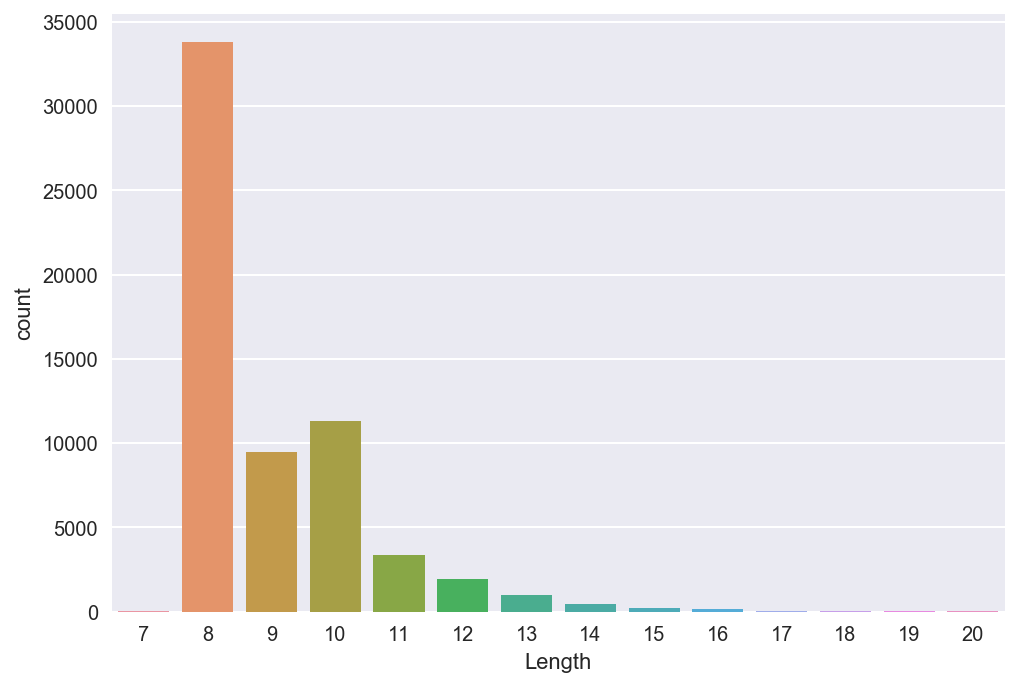

In [8]:
# graping with seaborn
sns.countplot(data=p, x="Length")
print("length of the average passowrd is: {0:.2f} characters".format(np.mean(p.Length)))
occ = p.Length.value_counts()
display(occ)
print("passwords of length 8 make up {0:.2f}% of all of the passwords".format(100*occ[8]/len(p)))

# grouping passwords with more than average length:
gtavg = [x for x in p.Passwords if len(x) >= 9]

Pretty much what we find here is that 54.80% of the passwords in a sample of as many as 61628 passwords can be hacked in approx. 2.6 days, if we look at the webscraped data.

That was just considering that we look at all 94 characters. But looking at the data, we can see that not all passwords contain a character from each character category. To see a clear distribution of what category is used most commonly. 

punctuations are seen in 9.04% of all the passwords in the sample


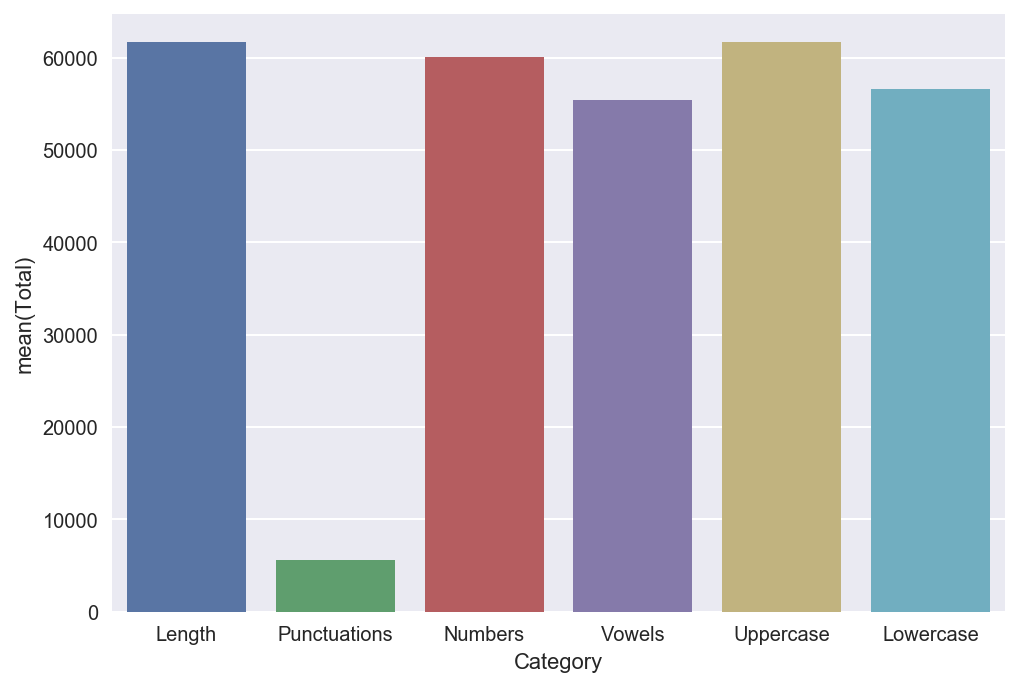

In [9]:
# making masked dataframe with true and false values
mp = (p.loc[:, "Length":"Lowercase"]>0).sum()
mask = pd.DataFrame({"Category": mp.index, "Total": mp.values})
sns.barplot(data=mask, x="Category", y="Total")
print("punctuations are seen in {0:.2f}% of all the passwords in the sample".format(100*mp["Punctuations"]/len(p)))

We know that the punctuation method in string contains 32 characters. The fact that less than 10% of passwords contain these punctuation characters. Recall that initially we had 94 characters from which we can choose combinations to find passwords. So essentially, it is a lot more easier to eliminate those 32 characters and reduce the list to 62 characters. And this makes things a lot easier to guess. We can do a comparison with the chart we came up with earlier:

In [10]:
for i in range(5,13):
    guess(i, 62)
pass_speeds
    
speeds["time taken to crack (62 character list)"] = pass_speeds
pass_speeds=[] # making the speeds list empty again for later use
speeds

,length of password,time taken to crack (94 character list),time taken to crack (62 character list)
0,5 characters,0.03 years,0.0 years
1,6 characters,2.69 years,0.22 years
2,7 characters,252.98 years,13.74 years
3,8 characters,23779.68 years,851.76 years
4,9 characters,2235289.99 years,52809.05 years
5,10 characters,210117258.67 years,3274161.41 years
6,11 characters,19751022315.38 years,202998007.22 years
7,12 characters,1856596097646.14 years,12585876447.34 years


So to be as safe as they can be, all passwords should contain these special punctuation characters. What we skip here is that we only checked the number of passwords that contain only punctuation characters. Ones that contain something from each category are ultimately the most safe passwords.

It would be easier to say that the longer your password, the better it is, but then if you use only numbers in the password, you face a total number 9^n possible combinations where n is the number of characters in the password. And that itself is so hard to memorize. What I'm trying to convey is that a computer will probably be programmed to guess passwords using these specific groups.

It will check the combinations of all the letters (upper and lower), numbers, and punctuations. So it's actually good to choose characters from these different groups to make the password safer. 

To come back to that point I made earlier, we don't know how many of these have a character from each of these categories. So let's find that out:

In [11]:
# masking everything to a boolean value
masked_vals = p.iloc[:, 1:]>0

# removing the false values from the entire table
for i in range(5):
    masked_vals = masked_vals[masked_vals.iloc[:, i]]

# making list of words that do contain all these characters
with_puncs = p.loc[masked_vals.index, "Passwords"]
with_puncs.index = range(len(masked_vals)) # reindexing the 

print("out of the", len(p), "passwords, there are only", len(masked_vals), "passwords that have a character from each category.\n that is {0:.2f}% of passwords that have a character from the set of those 94 characters.".format(100*len(masked_vals)/len(p)))

out of the 61682 passwords, there are only 3398 passwords that have a character from each category.
 that is 5.51% of passwords that have a character from the set of those 94 characters.


The average length, is less than 9 characters, and most of these passwords are made of characters from a subset of 62 characters. If we recall our table that uses data from a machine that can guess at 800 keystrokes per second, what we find is that at 94 characters, it took roughly ten years. So from a set of 62 characters, that time probably roughens down to less than 6 years (I'm just guessing). Meaning that the average password in this list of 61682 password can probably be cracked while that password is still being used. 

In [12]:
display(chsp)

,length of password,time taken to crack (94 character list)
0,5 characters,0.03 seconds
1,7 characters,"approx, 9 minutes"
2,8 characters,"approx, 2,6 days"
3,9 characters,"approx, 9,1 years"
4,12 characters,"approx, 7,5 million years"


At this point, I also want to introduce another idea. Most of the character combinations that humans know, to be able to generate passwords from are words. And the plain fact that most passwords probably contain a word will make the process of guessing passwords much faster. For example, my approach is simple, and I came up with this in less a minute:

1. check if the head or tail of the string are non alphabetical characters
2. find length of password
3. count number of non alphabetical characters in total
4. if that number is the same as the number of non alphabetical characters at head/tail then the rest of the characters are simply just alphabets

In [13]:
import re # regex package for checking characters

# setting regex expressions for alphabets and other characters
alps = re.compile(r'[a-zA-Z]')
hspec = re.compile(r'^[^a-zA-Z]+')
lspec = re.compile(r'[^a-zA-Z]+$')

Having set up the proper regex patterns to detect alphabetical and not alphabetical patterns, we can run this on our set of passwords and check how many of them follow a pattern where there actually is a word right in the middle of these passwords, with other special characters appended to the head or tail. 

In [14]:
patt = 0 # counter for number of passwords that follow this pattern
le = 0 # total length of all the words
ht_pass = [] # list of these passwords
for i in p.Passwords:
    al = alps.findall(i)
    hd = hspec.findall(i)
    tl = lspec.findall(i)
        
    # head special characters
    if len(i) == len(al) + len(hd) or len(i) == len(al) + len(tl) or len(i) == len(al) + len(tl) + len(hd):
        ht_pass.append(i)
        patt += 1
        le += len(i)

print(patt, "out of the", len(p), "passwords is the amount of passwords that either start or end with\n a non alphabetical character, or are sandwhiched between such characters")
print(le/patt, "is the average length of passwords ")


10970 out of the 61682 passwords is the amount of passwords that either start or end with
 a non alphabetical character, or are sandwhiched between such characters
8.683409298085689 is the average length of passwords 


Something to notice here is that *the passwords that are of a predictable pattern (as above) are also below average in password length*, so on average, we need to use 94 characters and we cut that down to 52 after we guess the head and tail characters. At this point we can group all these differenty sets of passwords and look at which is actually the most "brute-force proof":

The different groups we have are passwords:
1. with more than or equal to the average length (9) (gtavg)
2. with punctuations (with_puncs)
3. head/tail non alphabetical characters (ht_pass)

# Entropy and Password Strength

At this point, I want to introduce entropy analysis. Entropy analysis is a measure of password strength, which is measured in bits. It's an equation which calculates this based on the entropy per symbol. And these symbols are characters in the common ASCII table, but they are sectionned in such a sense that if one of them comes up they are attributed to a specific entropy value.

Since entropy is an objective measure of how strong a password is, we can look at how well these three groups corelate with their respective entropies. Which will give us an idea of how we should make our passwords.

To check for entropy, we can use this equation: $$log_2{N}$$ where $$N = charset^{plen}$$ 

*charset = number of characters to choose from*, and 
*plen = password length in number of characters*

In [15]:
start = time.time()
# final dataframes with data which we will comapre with the entropy
gtavg_final = pd.DataFrame()
gtavg_final["Passwords"] = gtavg

with_puncs_final = pd.DataFrame()
with_puncs_final["Passwords"] = with_puncs

ht_pass_final = pd.DataFrame()
ht_pass_final["Passwords"] = ht_pass

# function for calculating the entropy 
def entropy(df):
    i = 0 # counter for indices in data frame
    for pw in df.loc[:, "Passwords"]:
        charset = 0
        plist = list(pw)
        
        if [val for val in plist if val in set(nums_in)]:
            charset += len(nums_in)
        if [val for val in plist if val in set(punc_in)]:
            charset += len(punc_in)
        if [val for val in plist if val in set(string.ascii_lowercase)]:
            charset += 26
        if [val for val in plist if val in set(string.ascii_uppercase)]:
            charset += 26
        
        # entropy calculation
        N = charset ** len(pw) 
        ent = np.math.log(N, 2)
        
        # assigning entropy in the table
        df.loc[i, "Entropy"] = float("{:.2f}".format(ent))
        i += 1
    
entropy(with_puncs_final)
entropy(ht_pass_final)
entropy(gtavg_final)
end = time.time()
print(end-start)

23.49734902381897


So after we set up three data frames to have the entropy values for the three categories, we can compare using entropy which of our broken up categories is the strongest.

We can now plot the distribution of these three different categories on one graph and check which category produces the highest entropy. This will tell us which type of pattern is the safest to use, in terms of protection from brute-force methods.

In [16]:
# adding indices in the data frames
gtavg_final["x-axis"] = gtavg_final.index
with_puncs_final["x-axis"] = with_puncs_final.index
ht_pass_final["x-axis"] = ht_pass_final.index

/Users/Yatin/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


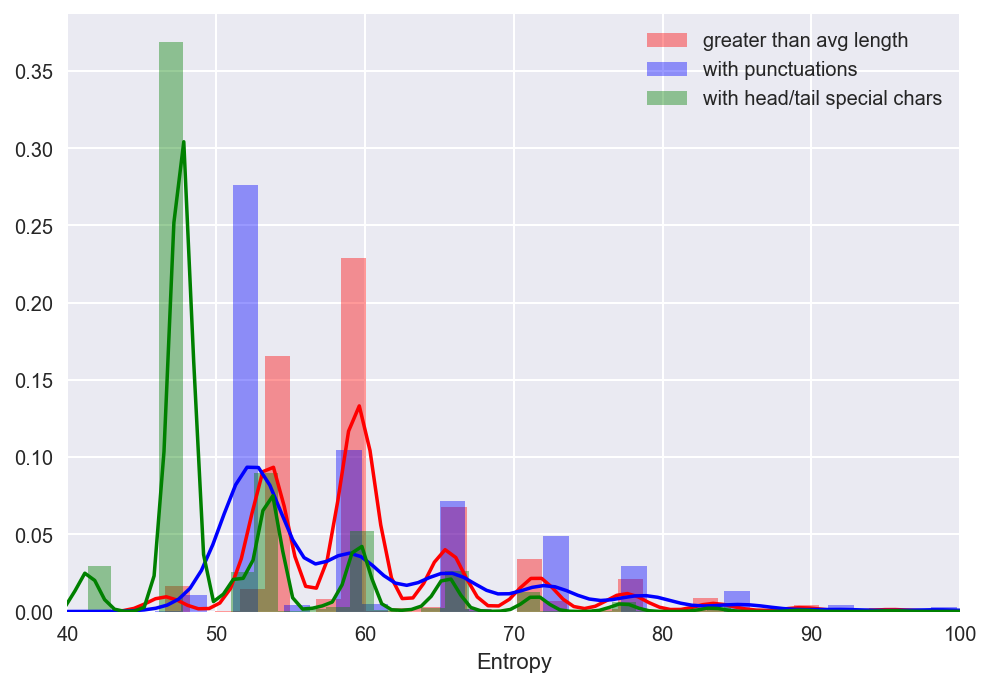

In [17]:
sns.distplot(gtavg_final.Entropy, color="red", label="greater than avg length")
sns.distplot(with_puncs_final.Entropy, color="blue", label="with punctuations")
sns.distplot(ht_pass_final.Entropy, color="green", label="with head/tail special chars")
plt.xlim(40,100)
plt.legend()

# Conclusion

It is not quite the cleanest representation of the data, but the takeaway is that the longer the password is, the safer it is. And we find that the blue curve dues spike close to the red one, but we also should remember that the blue and the green curves could just as well be subsets of the red curve. And as such, we should probably conduct an analysis on how password strength varies as we compare just raw length, with length and special characters. But by now, after reading through and understanding the results it's almost a given that the more variations that are in a password, the harder it is to guess via brute-force.